In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings 
warnings.filterwarnings("ignore")  #Ignore the Warning 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn import metrics as m
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv('train.csv')
df.shape

(42000, 785)

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X = df.drop(['label'],axis = 1)
Y = df['label']


In [6]:
train_x,test_x,train_y,test_y= train_test_split(X, Y, test_size= 0.3, random_state=20)  

In [7]:
def elbow_curve(k):
    empty_lst = []   
    for i in k:   
        clf = knn(n_neighbors=i)
        clf.fit(train_x,train_y)
        tmp = clf.predict(test_x)
        tmp = m.accuracy_score(tmp,test_y)
        error = 1-tmp
        empty_lst.append(error)
   
    return empty_lst

In [8]:
k = range(1,10)

In [9]:
test = elbow_curve(k)

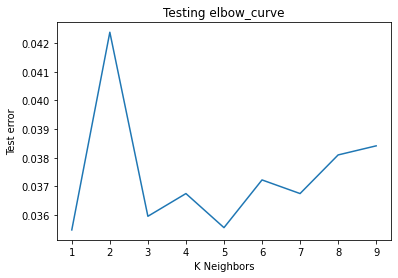

In [10]:
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Testing elbow_curve')
plt.show()


In [11]:
emp={}
for i in range(1,10):
    emp[i]=np.interp(i,k,test)

val=1
for j in range(1,10):
    if(val>emp[j]):
        val=emp[j]
        num=j

In [12]:
va = knn(n_neighbors=num)
va.fit(train_x,train_y)


KNeighborsClassifier(n_neighbors=1)

In [13]:
pred = va.predict(test_x)

In [14]:
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1241
           1       0.97      0.99      0.98      1421
           2       0.98      0.95      0.97      1250
           3       0.95      0.96      0.95      1321
           4       0.97      0.95      0.96      1188
           5       0.95      0.95      0.95      1158
           6       0.97      0.99      0.98      1185
           7       0.95      0.97      0.96      1324
           8       0.98      0.93      0.95      1245
           9       0.94      0.95      0.94      1267

    accuracy                           0.96     12600
   macro avg       0.96      0.96      0.96     12600
weighted avg       0.96      0.96      0.96     12600

